In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# [예제 1]
# 1. ImageDataGenerator 생성

gen=ImageDataGenerator(rotation_range=30, # 회전
                      width_shift_range=0.3, # 이동
                      shear_range=0.4, # 기울임
                      horizontal_flip=True) # 좌우반전

In [6]:
# 이미지 로드 및 정규화

img_array_list=[]
img_names=['data/dog1.jpg', 'data/dog2.jpg', 'data/cat1.jpg', 'data/cat2.jpg']

for i in range(len(img_names)):
    loaded_img=load_img(img_names[i], target_size=(100,100))
    loaded_img_array=img_to_array(loaded_img) / 255.0
    img_array_list.append(loaded_img_array)
img_array_list[0] # 각각의 컬러값 출력

array([[[0.972549  , 0.9019608 , 0.85490197],
        [0.9764706 , 0.90588236, 0.85882354],
        [0.98039216, 0.9137255 , 0.8745098 ],
        ...,
        [0.9882353 , 0.9607843 , 0.9372549 ],
        [0.9843137 , 0.972549  , 0.9529412 ],
        [0.9843137 , 0.972549  , 0.9529412 ]],

       [[0.972549  , 0.9019608 , 0.85490197],
        [0.9764706 , 0.90588236, 0.85882354],
        [0.98039216, 0.9137255 , 0.8745098 ],
        ...,
        [0.98039216, 0.96862745, 0.9411765 ],
        [0.9843137 , 0.972549  , 0.9529412 ],
        [0.98039216, 0.96862745, 0.9490196 ]],

       [[0.9764706 , 0.90588236, 0.85882354],
        [0.9764706 , 0.90588236, 0.85882354],
        [0.9764706 , 0.9098039 , 0.87058824],
        ...,
        [0.98039216, 0.96862745, 0.9411765 ],
        [0.9764706 , 0.95686275, 0.93333334],
        [0.9764706 , 0.95686275, 0.93333334]],

       ...,

       [[0.9411765 , 0.9372549 , 0.92156863],
        [0.9411765 , 0.9372549 , 0.92156863],
        [0.9529412 , 0

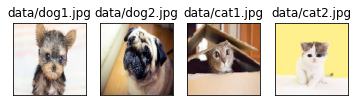

In [7]:
plt.figure(figsize=(6,6))
for i in range(len(img_array_list)):
    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

In [26]:
batch_size=4 # 2개의 보강 이미지를 만듦
data_gen=gen.flow(np.array(img_array_list), batch_size=batch_size)

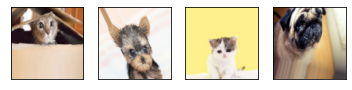

In [27]:
img=data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

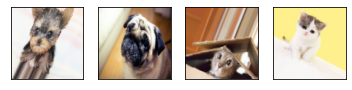

In [28]:
img=data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

In [33]:
# 훈련 데이터 배열에 추가할 수 있으며 validation 이미지로 사용 가능

In [59]:
gen=ImageDataGenerator(rotation_range=30, # 회전
                      width_shift_range=0.3, # 이동
                      shear_range=0.4, # 기울임
                      horizontal_flip=True, # 좌우반전
                      rescale = 1/255.0)

In [60]:
data_path='./test_dir/'
batch_size=5

data_gen=gen.flow_from_directory(directory=data_path,
                                #batch_size=batch_size, 
                                shuffle=True,
                                target_size=(100,100), 
                                class_mode='categorical')

# batch_size 지정하지 않으면 원래 이미지 개수만큼
# 해상도가 다른 이미지는 학습이 어렵기 때문에 target_size로 해상도 지정
# 4가지 클래스로 분류된 12개의 이미지 찾음

Found 12 images belonging to 4 classes.


In [65]:
print(data_gen[0])

(array([[[[0.17218044, 0.13547842, 0.06381764],
         [0.17090628, 0.13611549, 0.06413618],
         [0.1696321 , 0.13675258, 0.06445472],
         ...,
         [0.08534558, 0.08502069, 0.07049857],
         [0.09790374, 0.08995067, 0.05829525],
         [0.10090407, 0.09406959, 0.05738267]],

        [[0.1764706 , 0.14184166, 0.06841732],
         [0.1764706 , 0.14088604, 0.06778023],
         [0.1764706 , 0.13993041, 0.06714315],
         ...,
         [0.1052736 , 0.09231392, 0.05517464],
         [0.122487  , 0.10231225, 0.04748883],
         [0.13774294, 0.11416994, 0.06411612]],

        [[0.16517785, 0.13945168, 0.0790578 ],
         [0.16645202, 0.14008877, 0.07810217],
         [0.16772619, 0.14072584, 0.07714655],
         ...,
         [0.12335871, 0.1075343 , 0.06077487],
         [0.15017012, 0.12361775, 0.05212483],
         [0.14093366, 0.10958382, 0.05876242]],

        ...,

        [[0.17616796, 0.22292414, 0.1855243 ],
         [0.16793565, 0.20576774, 0.21305743

In [62]:
img, label=data_gen.next()
print(len(img))
print(label)

12
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


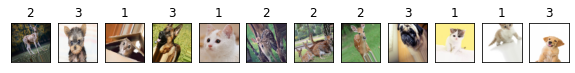

In [63]:
plt.figure(figsize=(10,10))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])

In [66]:
gen=ImageDataGenerator(rotation_range=30, # 회전
                      width_shift_range=0.3, # 이동
                      shear_range=0.4, # 기울임
                      horizontal_flip=True, # 좌우반전
                      rescale = 1/255.0)

In [67]:
data_path='./flower_photos/'
batch_size=5

data_gen=gen.flow_from_directory(directory=data_path,
                                #batch_size=batch_size, 
                                shuffle=True,
                                target_size=(240,240), 
                                class_mode='categorical')

Found 3670 images belonging to 5 classes.


In [68]:
print(data_gen[2])

(array([[[[7.07383633e-01, 7.46599317e-01, 7.93658137e-01],
         [7.10020423e-01, 7.49236107e-01, 7.96294928e-01],
         [7.11905658e-01, 7.51121342e-01, 7.98180163e-01],
         ...,
         [6.27451003e-01, 6.66577816e-01, 7.05837905e-01],
         [6.24427438e-01, 6.64852500e-01, 7.05277681e-01],
         [6.21181548e-01, 6.62905037e-01, 7.04628468e-01]],

        [[7.06024170e-01, 7.45239854e-01, 7.92298675e-01],
         [7.06694305e-01, 7.45909989e-01, 7.92968810e-01],
         [7.09990680e-01, 7.49206364e-01, 7.96265185e-01],
         ...,
         [6.08342886e-01, 6.55201852e-01, 7.02060759e-01],
         [6.04547858e-01, 6.52705073e-01, 7.00313151e-01],
         [6.00652874e-01, 6.50108457e-01, 6.98365688e-01]],

        [[7.08737135e-01, 7.47952878e-01, 7.95011699e-01],
         [7.06027031e-01, 7.45242715e-01, 7.92301536e-01],
         [7.06113994e-01, 7.45329678e-01, 7.92388499e-01],
         ...,
         [5.85246384e-01, 6.39837503e-01, 6.90662444e-01],
         

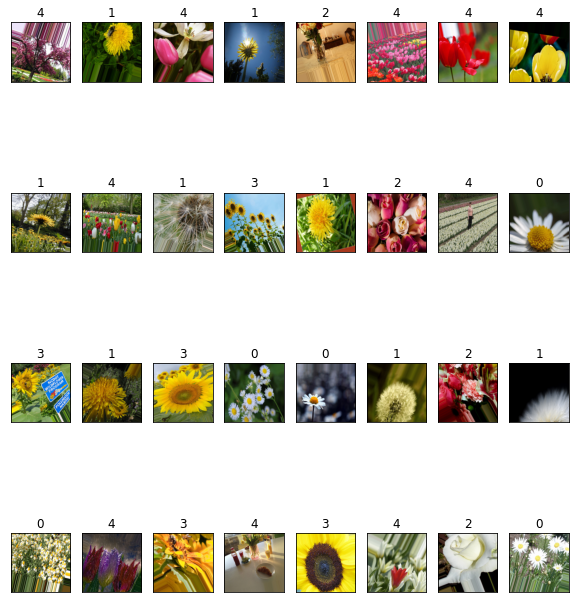

In [79]:
img, label=data_gen.next()

plt.figure(figsize=(10,12))
for i in range(len(img)):
    plt.subplot(4, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])